In [ ]:
import pandas as pd

df = pd.DataFrame({'Height':[158, 158, 160, 160, 160, 162, 163, 163, 165, 165, 168, 170],
                   'Weight':[58, 63, 59, 60, 64, 60, 64, 62, 65, 63, 66, 68],
                   'T-shirt Size':['M','M','M','M','M','M','L','L','L','L','L','L']})

<Axes: xlabel='Height', ylabel='Weight'>

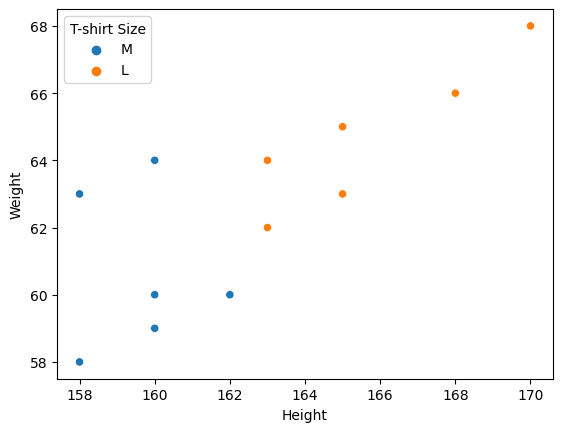

In [ ]:
# Step 1
import seaborn as sns
sns.scatterplot(x=df['Height'], y=df['Weight'], hue=df['T-shirt Size'])

In [ ]:
# Step 2
X = df.drop('T-shirt Size', axis=1)
X = (X - X.min()) / (X.max() - X.min())

In [ ]:
# Step 3
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, init='random', n_init=2, max_iter=200)
model.fit(X)
print(model.cluster_centers_)
print(model.labels_)

[[0.68333333 0.72      ]
 [0.17857143 0.28571429]]
[1 1 1 1 1 1 0 1 0 0 0 0]


<Axes: xlabel='Height', ylabel='Weight'>

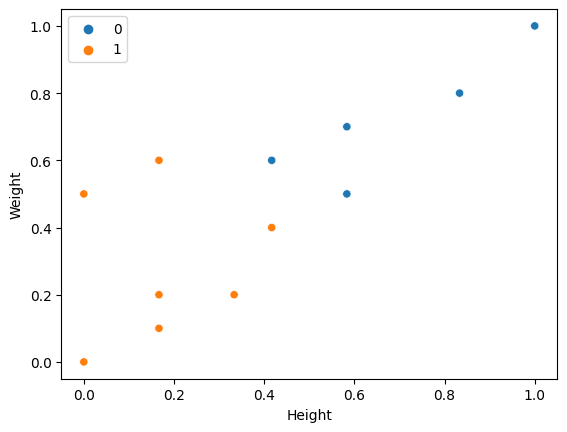

In [ ]:
sns.scatterplot(x=X['Height'], y=X['Weight'], hue=model.labels_)

In [24]:
# Step 3
from sklearn.cluster import AgglomerativeClustering

model2 = AgglomerativeClustering(metric='euclidean', linkage='single', compute_distances=True) # n_clusters, distance_threshold
model2.fit(X)

AgglomerativeClustering(compute_distances=True, linkage='single',
                        metric='euclidean')

<Axes: xlabel='Height', ylabel='Weight'>

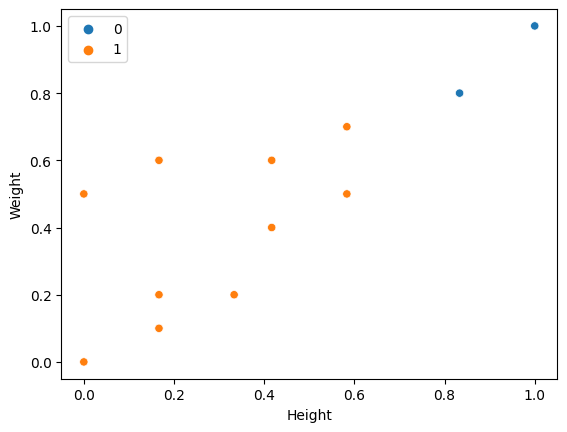

In [25]:
sns.scatterplot(x=X['Height'], y=X['Weight'], hue=model2.labels_)

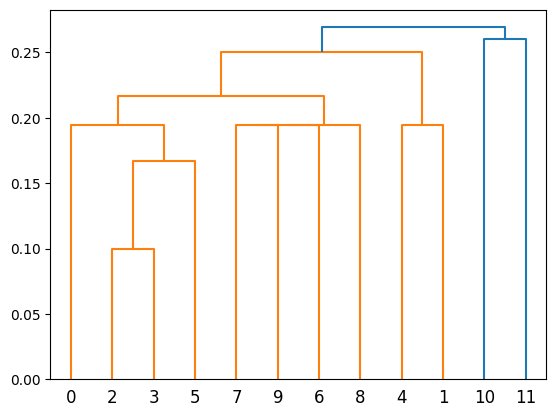

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

counts = np.zeros(model2.children_.shape[0])
n_samples = len(model2.labels_)
for i, merge in enumerate(model2.children_):
  current_count = 0
  for child_idx in merge:
    if child_idx < n_samples:
      current_count += 1 # leaf node
    else:
      current_count += counts[child_idx - n_samples]
  counts[i] = current_count

linkage_matrix = np.column_stack( [model2.children_, model2.distances_, counts]).astype(float)
# Plot the corresponding dendrogram
dendrogram(linkage_matrix, color_threshold=0.26)
plt.show()